In [ ]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
import seaborn as sns

# Geting the data

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
train_data=pd.read_csv('train.csv')
train_data.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [ ]:
test_data=pd.read_csv('test.csv')
test_data.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


# Exploring data (EDA)


In [ ]:
#To get an idea of the size of the dataset.
print("train data length is ", len(train_data))
print("test data length is ",len(test_data))

train data length is  43152
test data length is  10788


In [ ]:
# Checking the shape of the dataset.
# Checking the type of the dataset.
print('The dataset shape: ', train_data.shape)  
print('\nThe dataset Columns types:\n', train_data.dtypes) 

The dataset shape:  (43152, 11)

The dataset Columns types:
 Id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


In [ ]:
#to display information about the dataset, such as the number of non-null values in each column and the memory usage
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [ ]:
train_data.corr()

<ipython-input-8-8d2cc80a8830>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,Id,carat,depth,table,price,x,y,z
Id,1.000000,0.001141,-0.000776,-0.000739,-0.001111,-0.000519,0.001660,-0.000981
carat,0.001141,1.000000,0.023944,0.182889,0.921911,0.975760,0.947060,0.948923
depth,-0.000776,0.023944,1.000000,-0.302794,-0.013137,-0.029601,-0.033354,0.090834
table,-0.000739,0.182889,-0.302794,1.000000,0.128501,0.197342,0.184310,0.150746
price,-0.001111,0.921911,-0.013137,0.128501,1.000000,0.885181,0.861354,0.857665
x,-0.000519,0.975760,-0.029601,0.197342,0.885181,1.000000,0.968954,0.965677
y,0.001660,0.947060,-0.033354,0.184310,0.861354,0.968954,1.000000,0.942670
z,-0.000981,0.948923,0.090834,0.150746,0.857665,0.965677,0.942670,1.000000


In [ ]:
test_data.corr()

<ipython-input-10-861ec38ca07d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_data.corr()


,Id,carat,depth,table,x,y,z
Id,1.000000,-0.011895,0.004524,-0.000494,-0.010122,-0.009740,-0.009137
carat,-0.011895,1.000000,0.045439,0.176564,0.972454,0.971301,0.971687
depth,0.004524,0.045439,1.000000,-0.267480,-0.007899,-0.012627,0.111747
table,-0.000494,0.176564,-0.267480,1.000000,0.187377,0.181566,0.151696
x,-0.010122,0.972454,-0.007899,0.187377,1.000000,0.998737,0.991647
y,-0.009740,0.971301,-0.012627,0.181566,0.998737,1.000000,0.991242
z,-0.009137,0.971687,0.111747,0.151696,0.991647,0.991242,1.000000


In [ ]:
#checking if there is any missing value for the training data
print(train_data.isnull().sum())

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


* summery of ouputs:
  *  The data set contains 43152 row, 11 columns
  *  Cut, Color, Clarity are Categorical data
  *  carat, depth, table, price, x, y ,z are Numerical data
  *  No missing a null values among entries

In [ ]:
# number of unique values in training set
train_data.nunique()

Id         43152
carat        266
cut            5
color          7
clarity        8
depth        179
table        121
price      10640
x            546
y            543
z            368
dtype: int64

In [ ]:
# number of suplicated rows
duplicates = train_data.duplicated()
print('Number of duplicate rows = %d' % (duplicates.sum()))

Number of duplicate rows = 0


* The result shows that are are 0 duplicated rows 

In [ ]:
train_data.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


From the output, we can see that:

  * The 'id' column is just a unique identifier for each row and does not provide any useful information for our model.
  * The 'carat' column ranges from 0.2 to 5.01, with an average of 0.798 carats.
  * The 'depth' column ranges from 43 to 79, with an average of 61.747 degrees.
  * The 'table' column ranges from 43 to 95, with an average of 57.457 degrees.
  * The 'price' column is our target variable and ranges from 326 to 18823 dollars.
  * The 'x', 'y', and 'z' columns represent the length, width, and depth of each diamond in millimeters and have similar distributions and summary statistics.

# Data Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

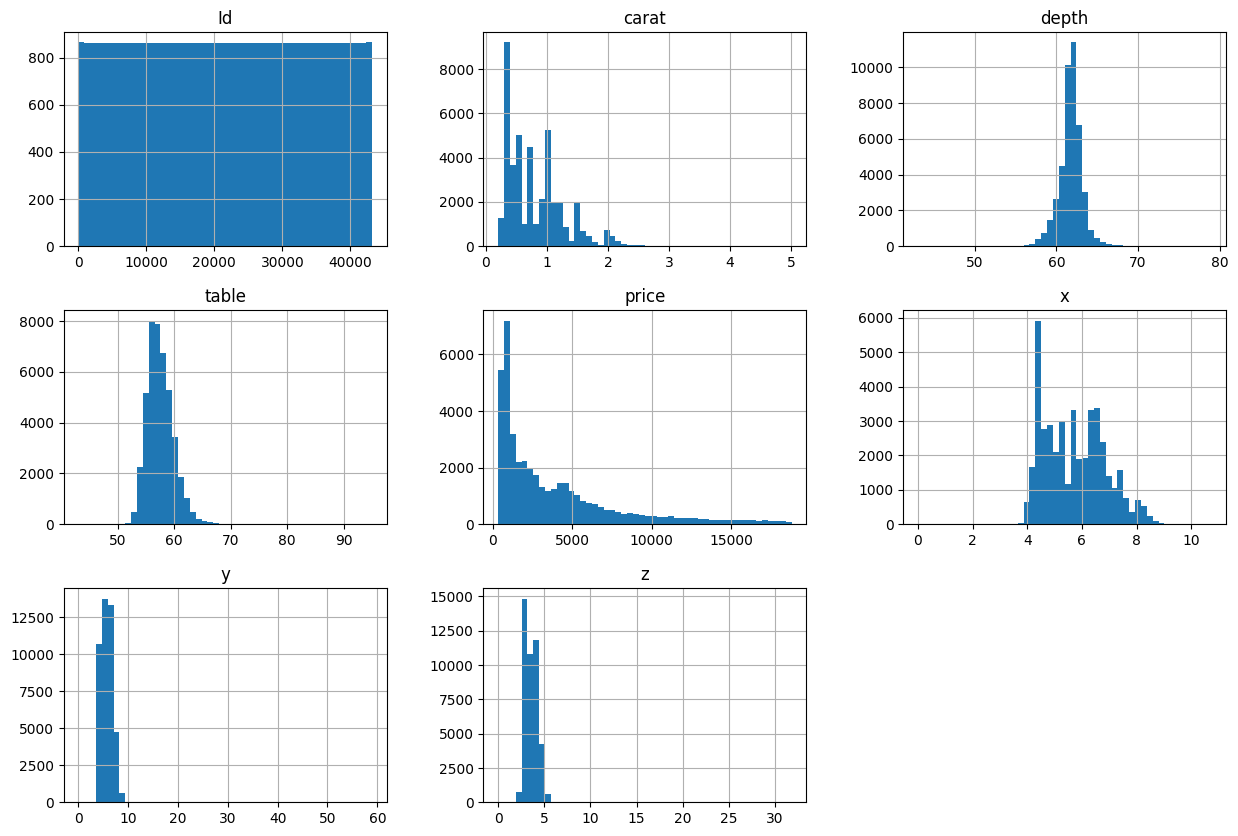

In [ ]:
# Histograms

train_data.hist(bins=50, figsize=(15,10))
plt.show()

* From the histograms, we can see that:

    - The 'carat' column has a skewed right distribution, with most diamonds having a weight of less than 1 carat.
    - The 'depth' column has a roughly normal distribution, with some outliers above 70 degrees.
    - The 'table' column has a bimodal distribution, with a peak around 53 degrees and another peak around 60 degrees.
    - The 'price' column has a skewed right distribution, with most diamonds priced below 10,000 dollars.
    
 *(Note:only 8 of the 11 columns have a histogram plot since 'Cut, Color, Clarity' are categorical data).   

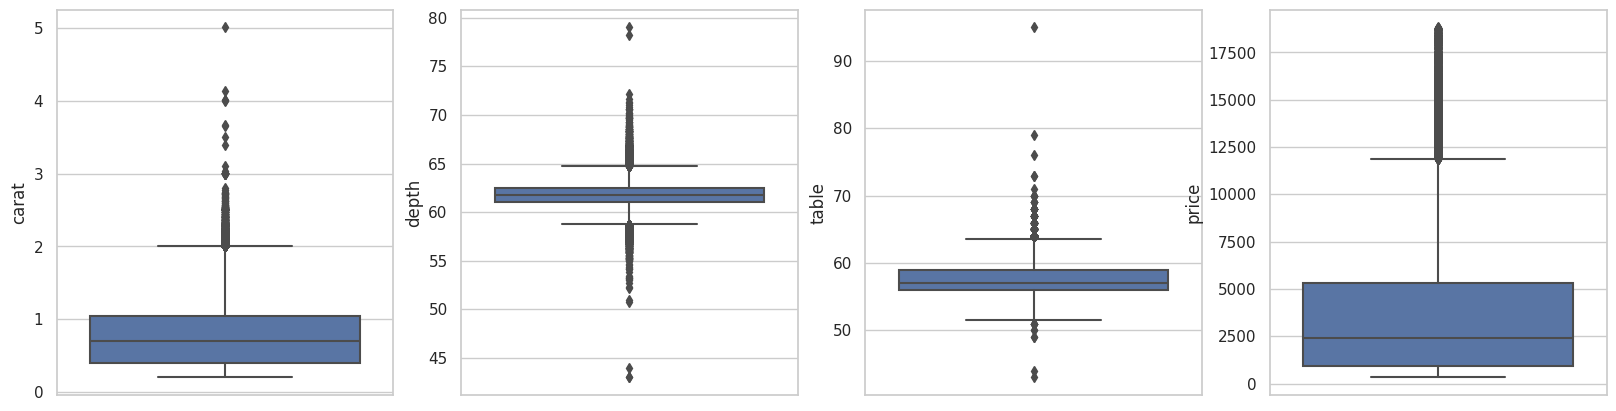

In [ ]:

# Box plots
sns.set(style='whitegrid')
fig, axes = plt.subplots(1, 4, figsize=(20,5))
sns.boxplot(data=train_data, y='carat', ax=axes[0])
sns.boxplot(data=train_data, y='depth', ax=axes[1])
sns.boxplot(data=train_data, y='table', ax=axes[2])
sns.boxplot(data=train_data, y='price', ax=axes[3])
plt.show()


* From the box plots, we can see that:

    - The 'carat' column has several outliers above 3 carats.
    - The 'depth' column has a median of around 62 degrees and some outliers above 70 degrees.
    - The 'table' column has a median of around 57 degrees and some outliers above 70 degrees.
    - The 'price' column has several outliers above 15,000 dollars.
    
  

 

### let's visualize the relationship between the numerical columns and the target variable using scatter plots and correlation analysis.

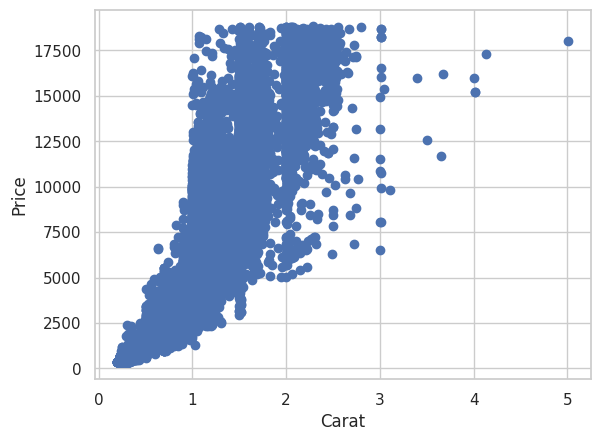

In [ ]:
# Scatterplot of carat vs price
plt.scatter(train_data['carat'], train_data['price'])
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

* The scatterplot shows us that there is a positive correlation between carat and price, which is expected as carat is a measure of diamond size, and larger diamonds are generally more expensive.

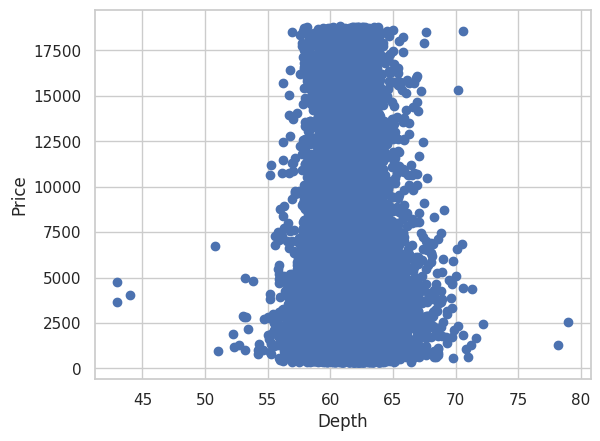

In [ ]:
# Scatterplot of depth vs price
plt.scatter(train_data['depth'], train_data['price'])
plt.xlabel('Depth')
plt.ylabel('Price')
plt.show()

* The scatterplot shows us that there is a weak negative correlation between depth and price. However, the relationship is not very clear, and there are many overlapping points.

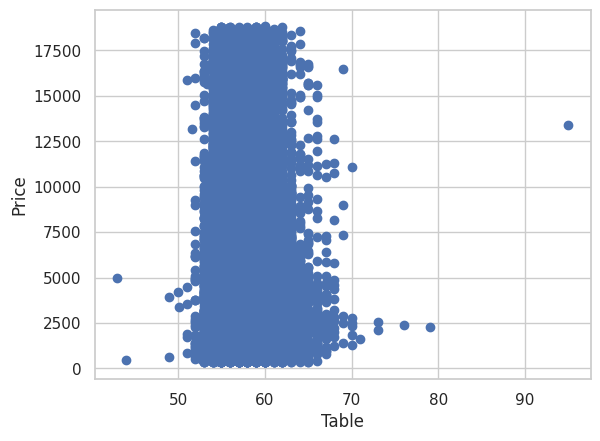

In [ ]:
# Scatterplot of table vs price
plt.scatter(train_data['table'], train_data['price'])
plt.xlabel('Table')
plt.ylabel('Price')
plt.show()

* Looking at the scatterplot of table versus price, we can see that there doesn't seem to be a clear relationship between these two variables. There are many overlapping points and no clear trend.


   "The depth and table variables do not appear to have a strong correlation with the price variable."

 ### let's visualize the distribution of diamond prices based on different catigorical features using Box plots


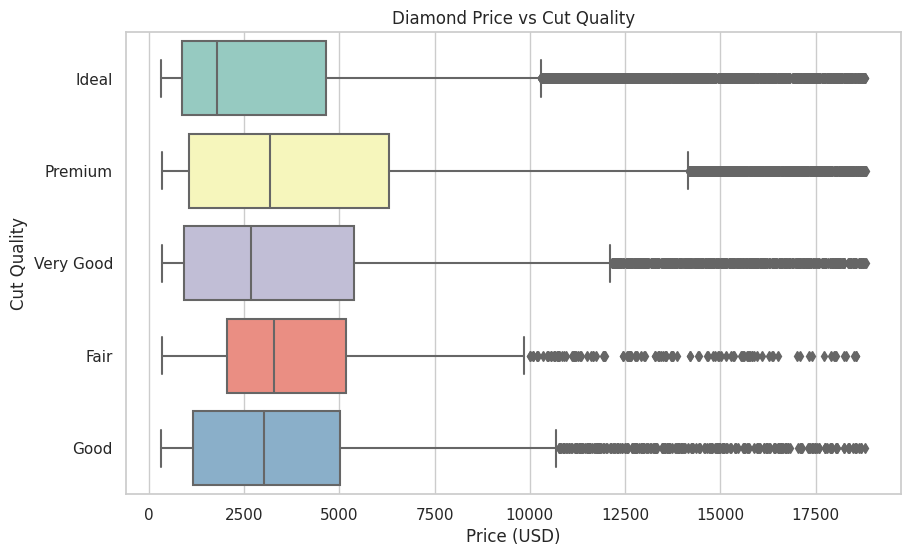

Ideal        17203
Premium      11113
Very Good     9658
Good          3881
Fair          1297
Name: cut, dtype: int64


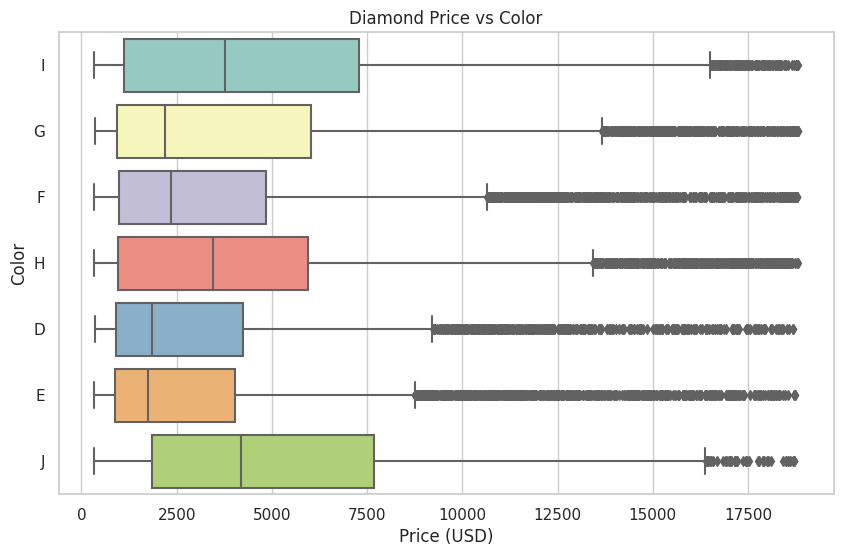

G    9060
E    7832
F    7633
H    6651
D    5421
I    4265
J    2290
Name: color, dtype: int64


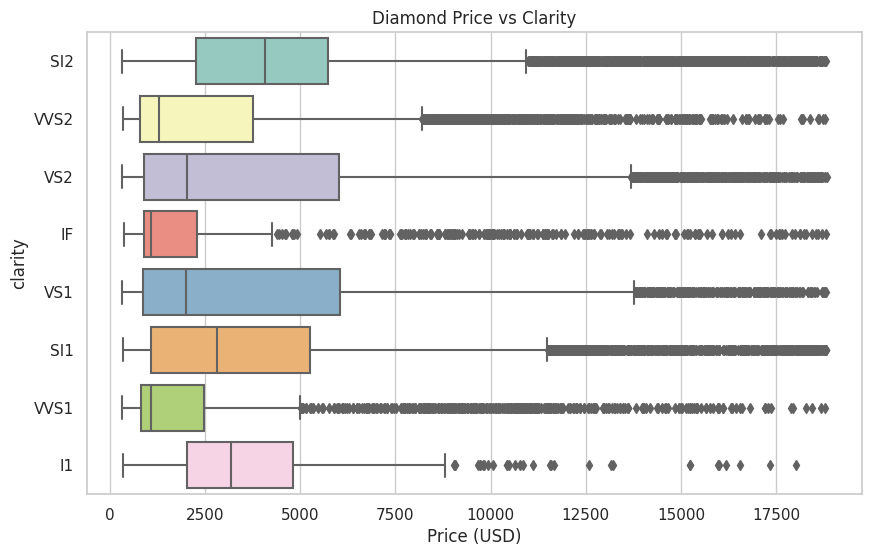

SI1     10428
VS2      9824
SI2      7432
VS1      6475
VVS2     4041
VVS1     2904
IF       1442
I1        606
Name: clarity, dtype: int64


In [ ]:
# Boxplots of 'cut' vs 'price'
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data,x='price' , y='cut' , palette='Set3', orient="h")
plt.title('Diamond Price vs Cut Quality')
plt.ylabel('Cut Quality')
plt.xlabel('Price (USD)')
plt.show()
# Count the number of diamonds for each cut quality category
print(train_data["cut"].value_counts())

#sns.boxplot(x=housing["median_house_value"], y=housing["ocean_proximity"],
# Boxplots of 'color' vs 'price'
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data, x='price',y='color',  palette='Set3',orient="h")
plt.title('Diamond Price vs Color')
plt.ylabel('Color')
plt.xlabel('Price (USD)')
plt.show()
# Count the number of diamonds for each color category
print(train_data["color"].value_counts())
# Create a box plot of price by clarity
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data,x='price',y='clarity', palette='Set3',orient="h")
plt.title('Diamond Price vs Clarity')
plt.ylabel('clarity')
plt.xlabel('Price (USD)')
plt.show()
# Count the number of diamonds for  clarity quality category
print(train_data["clarity"].value_counts())
plt.show()

* From the box plots, we can observe that:

    - The price of diamonds tends to increase with the quality of the cut, color, and clarity.
    - The range of prices for each category varies, with some categories having a larger spread of prices than others.

 ### let's visualize the pairwise relationships between the different features in the diamond dataset.

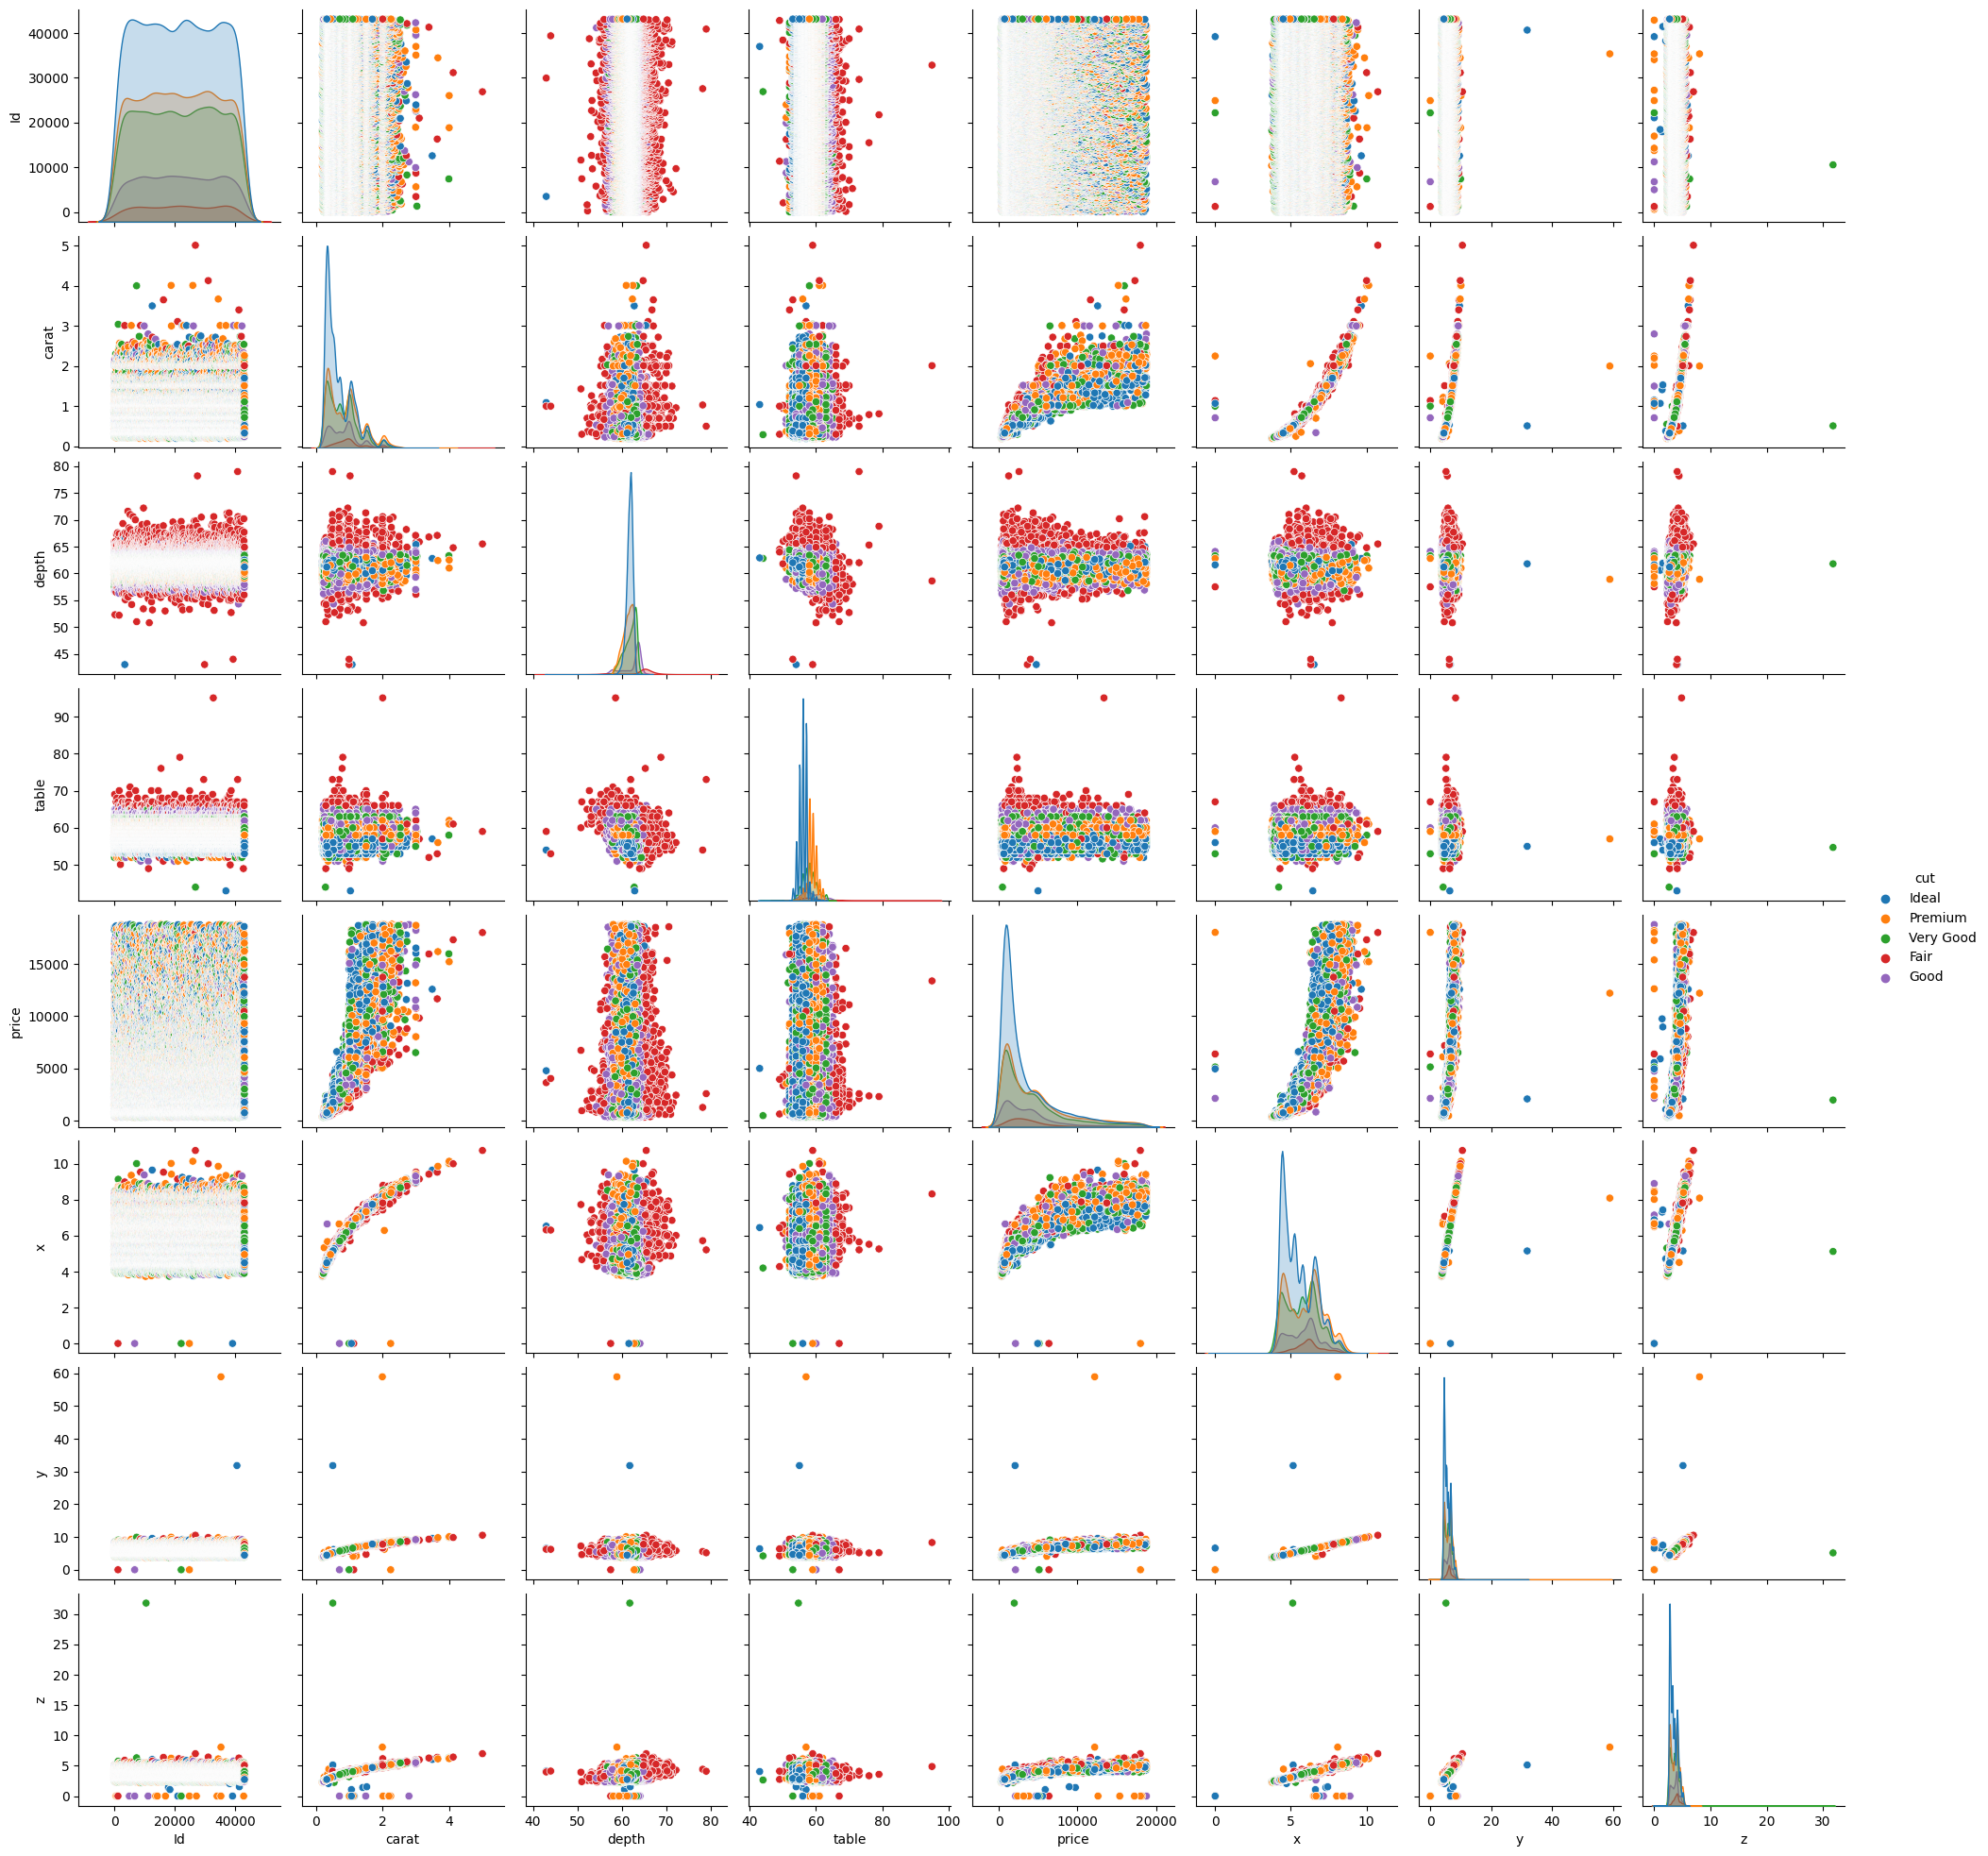

In [ ]:
plot= sns.pairplot(train_data, hue= "cut")

- The color of the points in each scatter plot is based on the cut quality of the diamonds.
- There is a strong positive relationship between the carat size and price of the diamonds.
- The depth and table of the diamonds have a weak negative relationship with price.
- Diamonds with lower depth and higher table tend to be more expensive.
- There is some variation in the relationship between price and the other diamond features based on cut quality.
- Diamonds with a higher cut quality tend to have a stronger positive relationship between carat size and price than diamonds   with lower cut quality.

### let's visualize the correlation between pairs of variables in our dataset creating correlation matrix Heatmap.

/tmp/ipykernel_34/1354796631.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_data.corr()


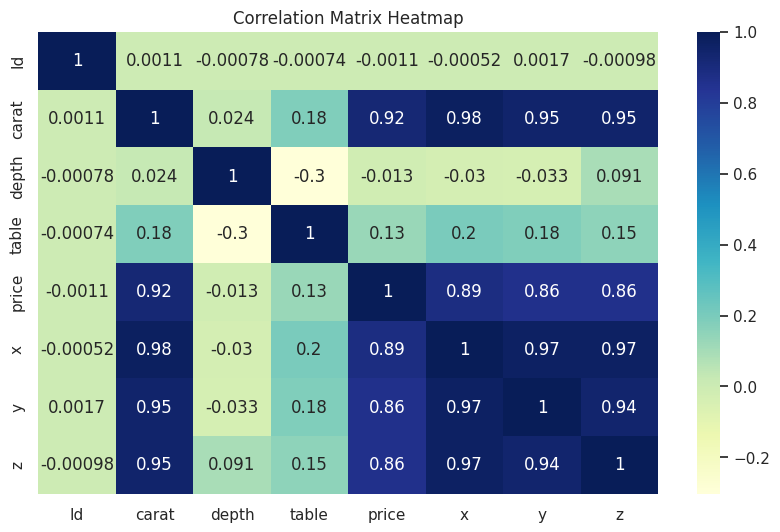

In [ ]:

# Compute the correlation matrix
corr = train_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix Heatmap')
plt.show()

* From the heatmap, we can observe that:

    - The carat variable has the strongest positive correlation with the price variable.
    - The depth and table variables have weak correlations with the price variable.

## Data preprocessing and model building 

In [ ]:
(train_data == 0).sum(axis=0)

Id          0
carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           5
y           4
z          17
dtype: int64

In [ ]:
# Replace zeros with the mean value of each column in train_data
train_data = train_data.replace(0, train_data.mean())

# Replace zeros with the mean value of each column in test_data
test_data = test_data.replace(0, test_data.mean())

C:\Users\Tonjoring Pro V.2\AppData\Local\Temp\ipykernel_16828\1477763074.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data = train_data.replace(0, train_data.mean())
C:\Users\Tonjoring Pro V.2\AppData\Local\Temp\ipykernel_16828\1477763074.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_data = test_data.replace(0, test_data.mean())


In this code we check for the existance of zeroo vaules and deal with them

In [ ]:

# Calculate volume based on x, y, and z
train_data['volume'] = train_data['x'] * train_data['y'] * train_data['z']
train_data = train_data.drop(['x','y', 'z'],axis = 1)
test_data['volume'] = test_data['x'] * test_data['y'] * test_data['z']
test_data = test_data.drop(['x','y', 'z'],axis = 1)
# Define the order of the categories based on their quality

cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']

# Define the column transformer to preprocess the data
preprocessor = ColumnTransformer(transformers=[
    ('cat', OrdinalEncoder(categories=[cut_order, clarity_order, color_order]), ['cut', 'clarity', 'color']),
    ('num', SimpleImputer(strategy='mean'), ['carat', 'depth', 'table', 'volume']),
    ('drop', 'drop', ['Id']),
])

# Define the pipeline with the preprocessor and the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(random_state=42)),
])

# Define the hyperparameter grid for the model
param_grid = {
   
'model__n_estimators': [500, 1000, 1500],
'model__max_depth': [10, 20, 30, None],
'model__min_samples_split': [2, 3, 5],
}


C:\Users\Tonjoring Pro V.2\AppData\Local\Temp\ipykernel_16828\937839335.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_data.corr()


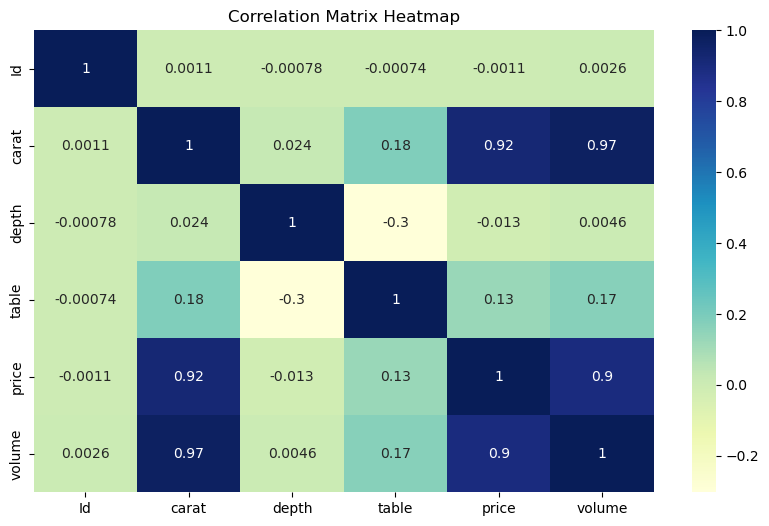

In [ ]:
# Compute the correlation matrix
corr = train_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix Heatmap')
plt.show()

This code goes through the following steps:

  - It defines the order of the categories for three specific columns: 'cut', 'clarity', and 'color'. This helps establish a meaningful ranking for these categories based on their quality.

  - A column transformer is created to preprocess the data. It applies different transformations to different columns:
     *  Categorical columns are encoded using OrdinalEncoder, which assigns   numerical values to the categories based on the specified category order.
     *   Missing values in the numerical columns ('carat', 'depth', 'table', 'x', 'y', 'z') are filled with the mean value of each column using SimpleImputer.
     *   The 'Id' column is dropped as it is not needed for the analysis.

  - A pipeline is defined, which is a sequence of data processing steps. In this case, the pipeline includes the preprocessor, a scaler (StandardScaler) to standardize the features, and a random forest regressor model (RandomForestRegressor) to make predictions.

  - A hyperparameter grid is defined to specify the different values to explore for the hyperparameters of the random forest model, such as the number of estimators, the maximum depth of the trees, and the minimum number of samples required to split an internal nod.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_data.drop('price', axis=1), train_data['price'], test_size=0.2, random_state=42)

# Print the shapes of the training and validation sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)


Shape of X_train: (34521, 10)
Shape of X_val: (8631, 10)
Shape of y_train: (34521,)
Shape of y_val: (8631,)


- This code splits the data into training and validation sets using the train_test_split function from scikit-learn. It then prints the shapes of the resulting sets for verification.

In [ ]:

# Define the grid search to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OrdinalEncoder(categories=[['Fair',
                                                                                                     'Good',
                                                                                                     'Very '
                                                                                                     'Good',
                                                                                                     'Premium',
                                                                                                     'Ideal'],
                                                                                                    ['I1',
                                                                               

- This code performs a grid search to find the best combination of hyperparameters for the model. 
 * It uses the GridSearchCV function from scikit-learn, specifying the pipeline, parameter grid, cross-validation strategy (cv=5), scoring metric (neg_mean_squared_error), and number of jobs to run in parallel (n_jobs=-1).
  * It then fits the grid search on the training data (X_train and y_train) to find the best hyperparameters.

In [ ]:
# Evaluate the model on the validation data
y_val_pred = grid_search.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print(f'Validation RMSE: {val_rmse:.2f}')

# Predict the prices for the test data
test_data['price'] = grid_search.predict(test_data.drop('Id', axis=1))

# Save the results to a CSV file
test_data[['Id', 'price']].to_csv('submission.csv', index=False)


Validation RMSE: 530.51


- This code evaluates the model's performance on the validation data by

  * predicting the target variable (price) for the validation set (X_val) 
  * It calculates the root mean squared error (RMSE) between the predicted values and the actual target values.
